# Ford used car Exploratory Data Analysis


    goal of this notebook Exploratory Data Analysis of Ford used car dataset
    
**Exploratory Data Analysis**
1. Reading the data as Pandas DataFrame
2. Checking the data types and looking for missing values
3. Checking the basic statistics of the numerical variables
4. Checking the unique values of the categorical features
5. Exploring the data using:
    1. Barplots
    2. Scatterplots
    3. Histogram
    4. Distribution
    5. Empirical Cumulative Distribution Function
    6. Boxplot
    7. Violinplot

<strong>Importing of required libraries and packages</strong>

In [3]:
# import the data analysis libraries
import pandas as pd
import numpy as np

# data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# generate clear images
sns.set_context('talk')

# for desired color palette 
plot_color = sns.color_palette("colorblind")

# set the background of the images
sns.set_style('darkgrid')

c:\users\alu\appdata\local\programs\python\python36\lib\site-packages\matplotlib\__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


<strong>Reading CSV file</strong>

In [4]:
df = pd.read_csv("ford.csv")

display(df.head())

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,48.7,1.0


### Given Feature variables:
**model**: categories of the ford car
<br>**year**: the year car was made
<br>**transmission**: the type of trasmission the car has
<br>**mileage**: the number of miles the vehicle has driven
<br>**fuelType**: energy source of the vehicle
<br>**tax**: road tax
<br>**mpg**: miles per gallon the vehicle can travel
<br>**engineSize**: Engine size is the volume of fuel and air that can be pushed through a car's cylinders

### Target Variable:
**price**: selling price of the car

<strong>Check for missing values and data type</strong>

In [5]:
#check of missing values
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17964 entries, 0 to 17963
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17964 non-null  object 
 1   year          17964 non-null  int64  
 2   price         17964 non-null  int64  
 3   transmission  17964 non-null  object 
 4   mileage       17964 non-null  int64  
 5   fuelType      17964 non-null  object 
 6   mpg           17964 non-null  float64
 7   engineSize    17964 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 1.1+ MB


None

Number of observations (rows) = 17964
<br>Number of columns = 8 (7 feature variables and 1 target variable)
<br>Number of categorical variables = 3: model, transmission, fuelType
<br>Number of numerical variables = 4: year, mileage, mpg, engineSize
#### The dataset has no missing values

In [6]:
# statistics of the numerical variables
display(df.describe())

,year,price,mileage,mpg,engineSize
count,17964.000000,17964.000000,17964.000000,17964.000000,17964.000000
mean,2016.864173,12280.078435,23361.880149,57.907832,1.350824
std,2.024987,4741.318119,19471.243292,10.125632,0.432383
min,1996.000000,495.000000,1.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18242.500000,58.900000,1.200000
75%,2018.000000,15299.000000,31052.000000,65.700000,1.500000
max,2020.000000,54995.000000,177644.000000,201.800000,5.000000


#### Observations:
- The oldest car in the dataset is from 1996
- The latest car is from 2020
- The average price of each used car is \\$12280
- The most expensive car price is \\$54995 and the cheapest car price is \\$495
- The lowest mileage is 1 mile and highest mileage is 177644 miles
- The lowest mpg is 20.8 and highest mpg is 201.8
- Engine Size varies from 0 to 5


<strong>Function to get number of observation for unique value in a column of Dataframe </strong>

In [7]:
def unique_val_count(data, column):
    '''
    This function finds the percentage of cars
    Args:
        data (dataframe) : dataframe of dataset
        column (string) : name of the column 
    Returns:
        dataframe
    '''
    #count the frequency of each unique data entries
    df_count = data[column].value_counts()
    
    #creating separate dataframes of the columns
    df_count = pd.DataFrame(df_count)
    
    # reset the index
    df_count = df_count.reset_index()

    #renaming column
    df_count = df_count.rename(columns={'index':column, column:'No_of_cars'})
    
    #finding the % of cars
    df_count['% of cars'] = np.round(((df_count['No_of_cars']/df_count['No_of_cars'].sum())*100), 2)
    
    return df_count

<strong>Getting number of observation for unique value in a column of Dataframe </strong>

In [8]:
model_count = unique_val_count(df,'model')
year_count = unique_val_count(df,'year')
price_count = unique_val_count(df,'price')
transmission_count = unique_val_count(df,'transmission')
mileage_count = unique_val_count(df,'mileage')
fuelType_count = unique_val_count(df,'fuelType')
mpg_count = unique_val_count(df,'mpg')
engineSize_count = unique_val_count(df,'engineSize')

<strong>Function to show the number of observations for each unique value in a column using a barplot

In [9]:
def barplot(data, column_x, color, rotation, yticks, fig_no):
    '''
    This function creates barplot
    Args:
        data (dataframe) : dataframe of dataset
        column_x (string) : name of the column
        color (string) : color of the barplot
        rotation (number) : orientation of the xticks
        yticks (array) : aray containing yticks
        fig_no (string) : figure no of the plot
    Returns:
        none
    '''
    
    # create a barplot using seaborn
    sns.barplot(x=column_x, y='% of cars', data=data, color=color, alpha=0.75)
    
    # set title of the barplot
    plt.title("fig."+fig_no+" Number of cars present for each " + column_x)
    
    #set lable of x axis
    plt.xlabel(column_x)
    
    #set label of y axis
    plt.ylabel("Percent of cars (%)")
    
    #set ticks of x asix
    plt.xticks(rotation=rotation)
    
    #set ticks of y axis
    plt.yticks(yticks)

In [10]:
 np.arange(0,41,10)

array([ 0, 10, 20, 30, 40])

<strong> Creating subplots

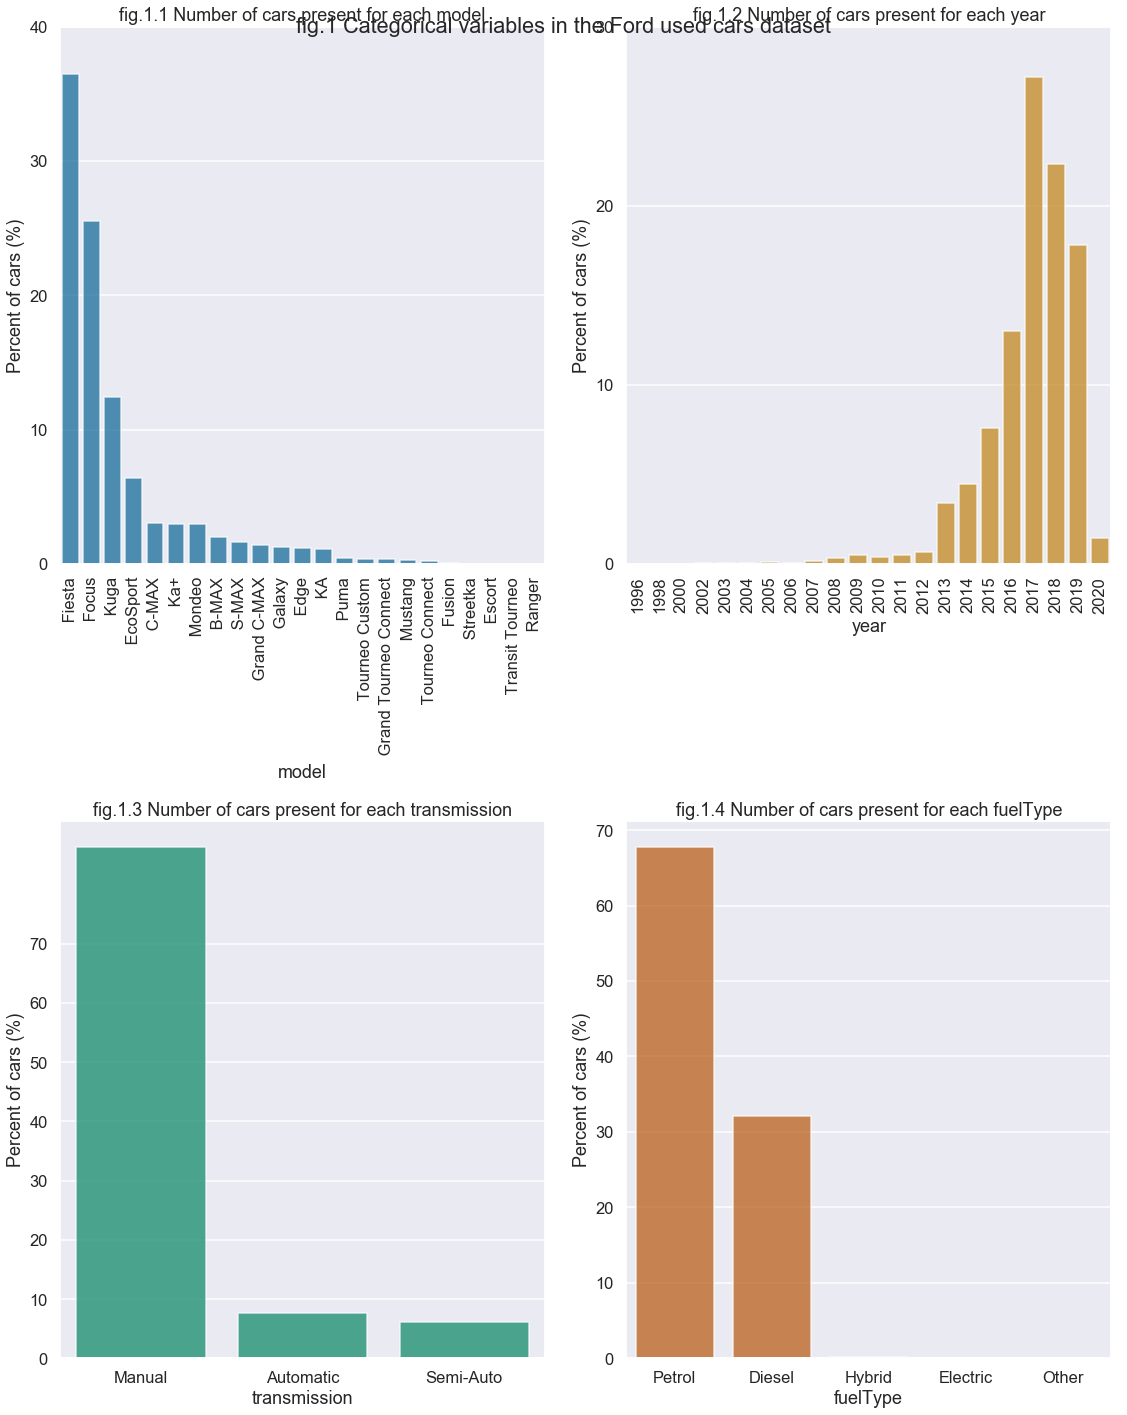

In [11]:
plt.figure(figsize=(16,20))

plt.subplot(2,2,1)
barplot(model_count, 'model', plot_color[0] , 90, np.arange(0,41,10), '1.1')

plt.subplot(2,2,2)
barplot(year_count, 'year', plot_color[1] , 90, np.arange(0,31,10) , '1.2')

plt.subplot(2,2,3)
barplot(transmission_count,'transmission', plot_color[2] , 0, np.arange(0,71,10) , '1.3')

plt.subplot(2,2,4)
barplot(fuelType_count, 'fuelType', plot_color[3] , 0, np.arange(0,71,10), '1.4')

plt.suptitle("fig.1 Categorical variables in the Ford used cars dataset")

plt.tight_layout()

plt.show()

In fig 1.1 shows the percentage distribution of used Ford cars based of the model.
<br>in fig 1.2 shows the percentage of used Ford cars per year, from 1996 to 2020.
<br>in fig 1.3 shows the three variety of transmissions and the percentage of each found in Ford used cars.
<br>in fig 1.2shows the percentage of used Ford cars with fuel types distributed among petrol, diesel, hybrid, electric or others.

**To have a comprehensive understanding of numerical data (price, mileage, mpg and engine size) and their relationship with other numerical data, scatterplot is best suited for the analysis.

Changes in price in relation to mileage
Changes in price in relation to miles per gallon (mpg)
Changes in price in relation to engine size

<strong>Scatterplot subplot of all the numeric columns in the dataframe</strong>

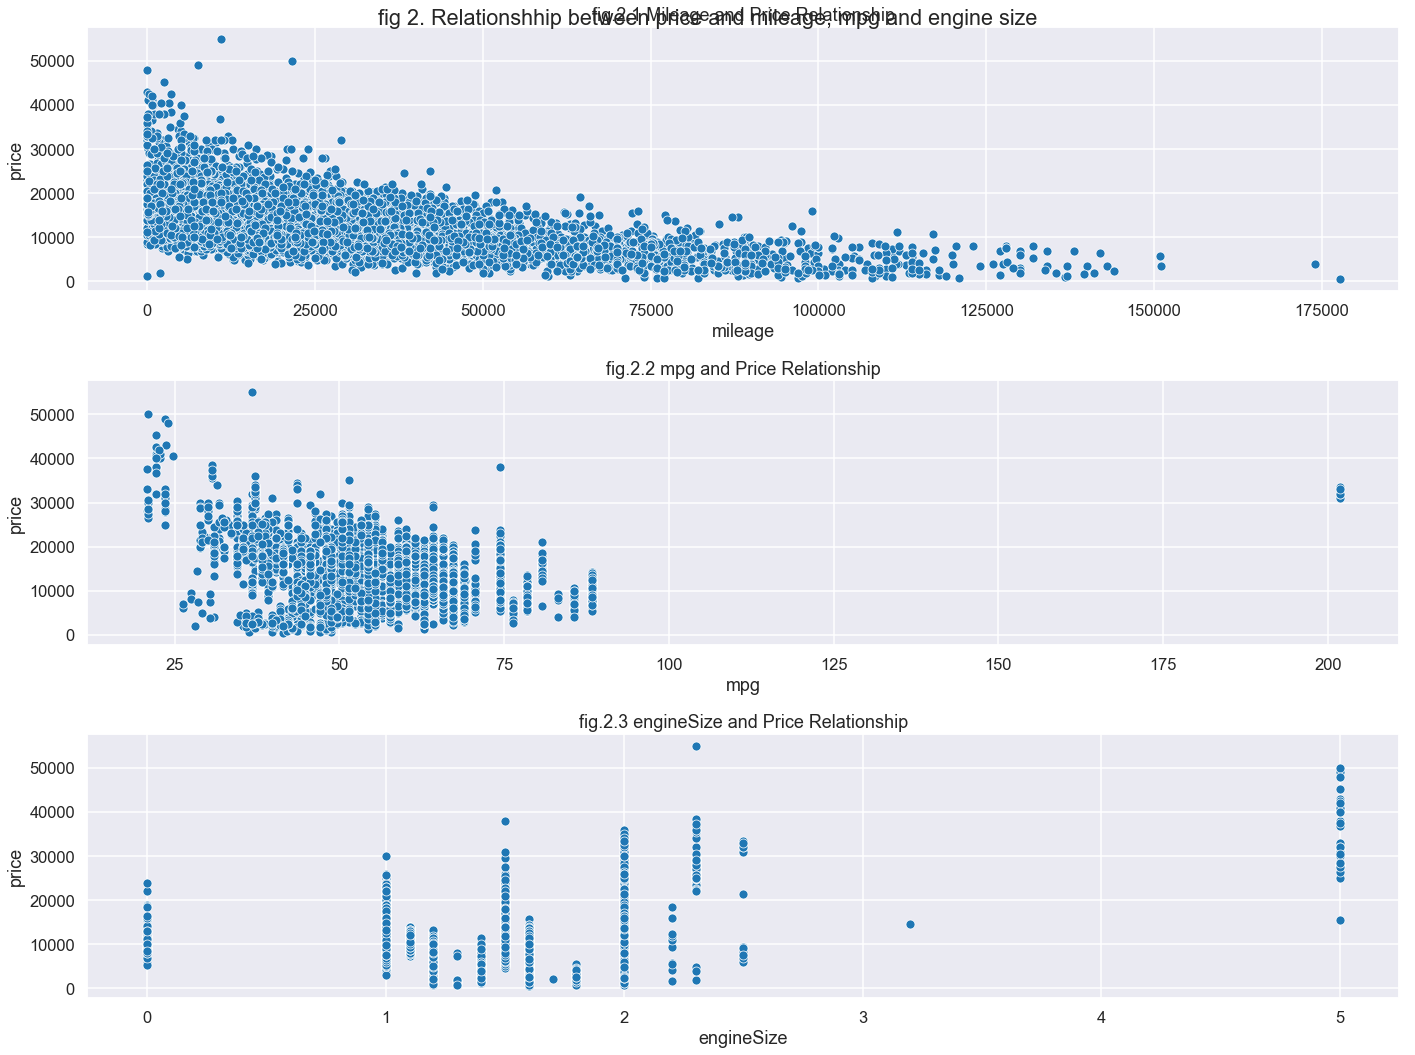

In [12]:
plt.figure(figsize=(20,15))

plt.subplot(3,1,1)
sns.scatterplot(x='mileage', y='price', data=df)
plt.title("fig.2.1 Mileage and Price Relationship")


plt.subplot(3,1,2)
sns.scatterplot(x='mpg', y='price', data=df)
plt.title("fig.2.2 mpg and Price Relationship")

plt.subplot(3,1,3)
sns.scatterplot(x='engineSize', y='price', data=df)
plt.title("fig.2.3 engineSize and Price Relationship")

plt.suptitle("fig 2. Relationshhip between price and mileage, mpg and engine size")
          
plt.tight_layout()
plt.show()

in fig.2.1 we can see theres an inverse relation between milage and price. As mileage inceases the price of an used car dcreasees

in fig.2.2 and 2.3 we dont see any linear relation between mpg and price or engine size and price

<strong> As we cannot determine any relation from Price and mpg or Price and engineSize subplots. Let us look in depth into the subplot of mileage and price</strong>

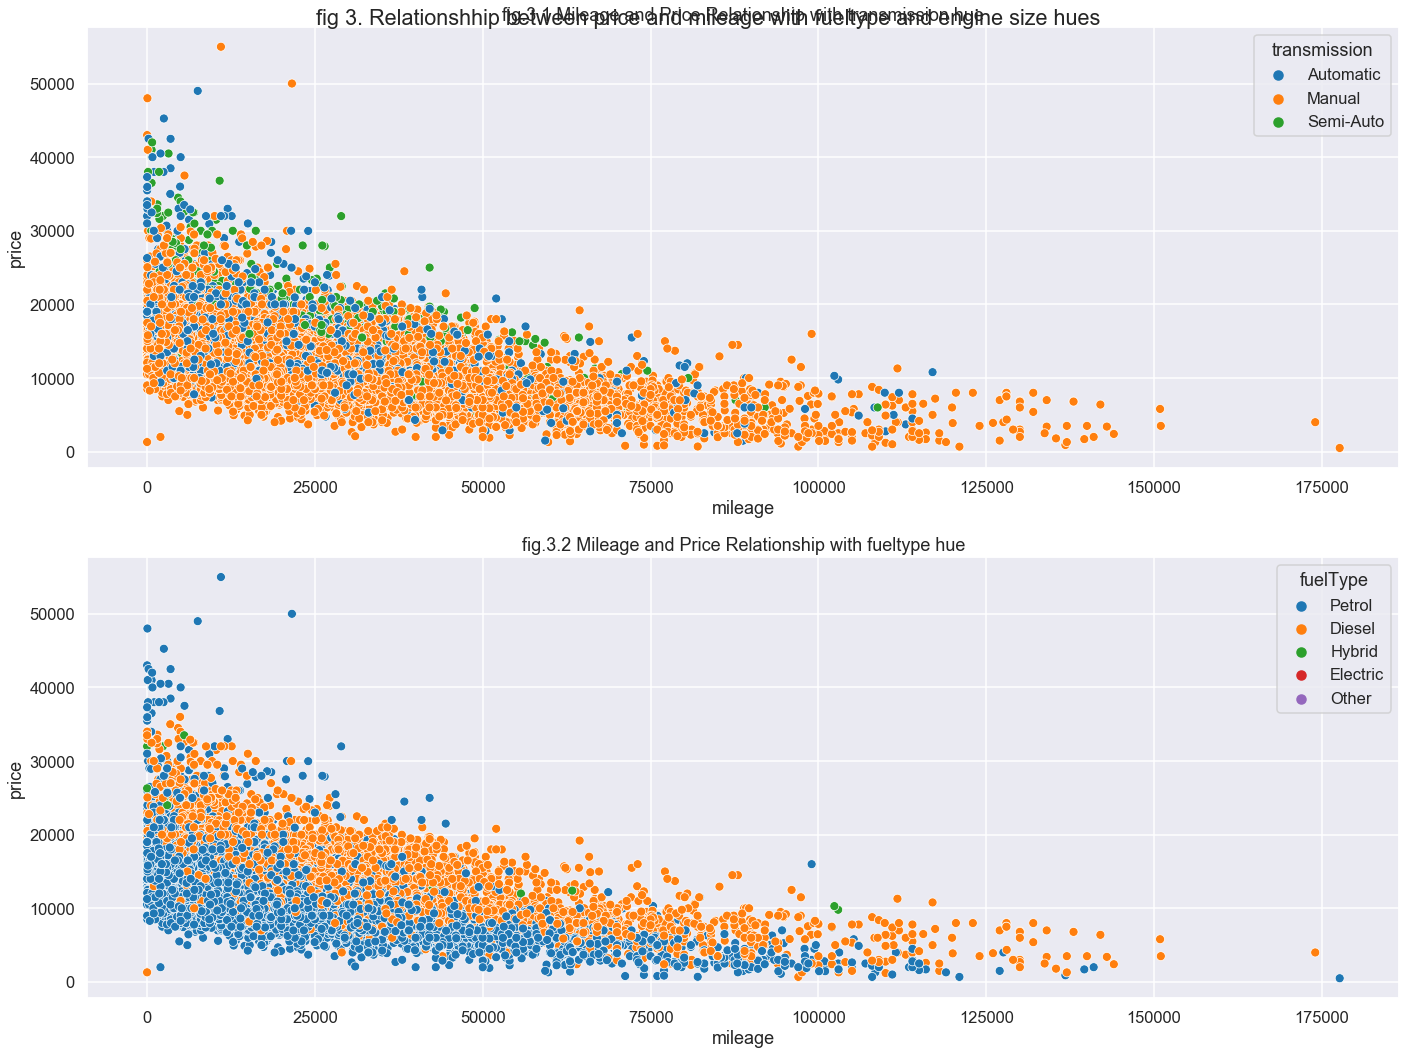

In [13]:
plt.figure(figsize=(20,15))

plt.subplot(2,1,1)
sns.scatterplot(x='mileage', y='price', data=df , hue='transmission')
plt.title('Transmission')
plt.title("fig.3.1 Mileage and Price Relationship with transmission hue")



plt.subplot(2,1,2)
sns.scatterplot(x='mileage', y='price', data=df , hue='fuelType')
plt.title('FuelType')
plt.title("fig.3.2 Mileage and Price Relationship with fueltype hue")

plt.suptitle("fig 3. Relationshhip between price and mileage with fueltype and engine size hues")


plt.tight_layout()
plt.show()

in fig 3.1 we can see that price of the Manual cars are lowset except for a few outliers, Automatic cars and Semi-auto cars are prices are higher

in fig 3.2 On the subplot Fueltype we can see that price of the Petrol cars are usually lowset except for a few outliers then Disel cars along with Hybrid cars while Electric and Other cars data is not quite visible since their data sample is low

<strong>Histogram subplot of all the numeric columns in the dataframe</strong>

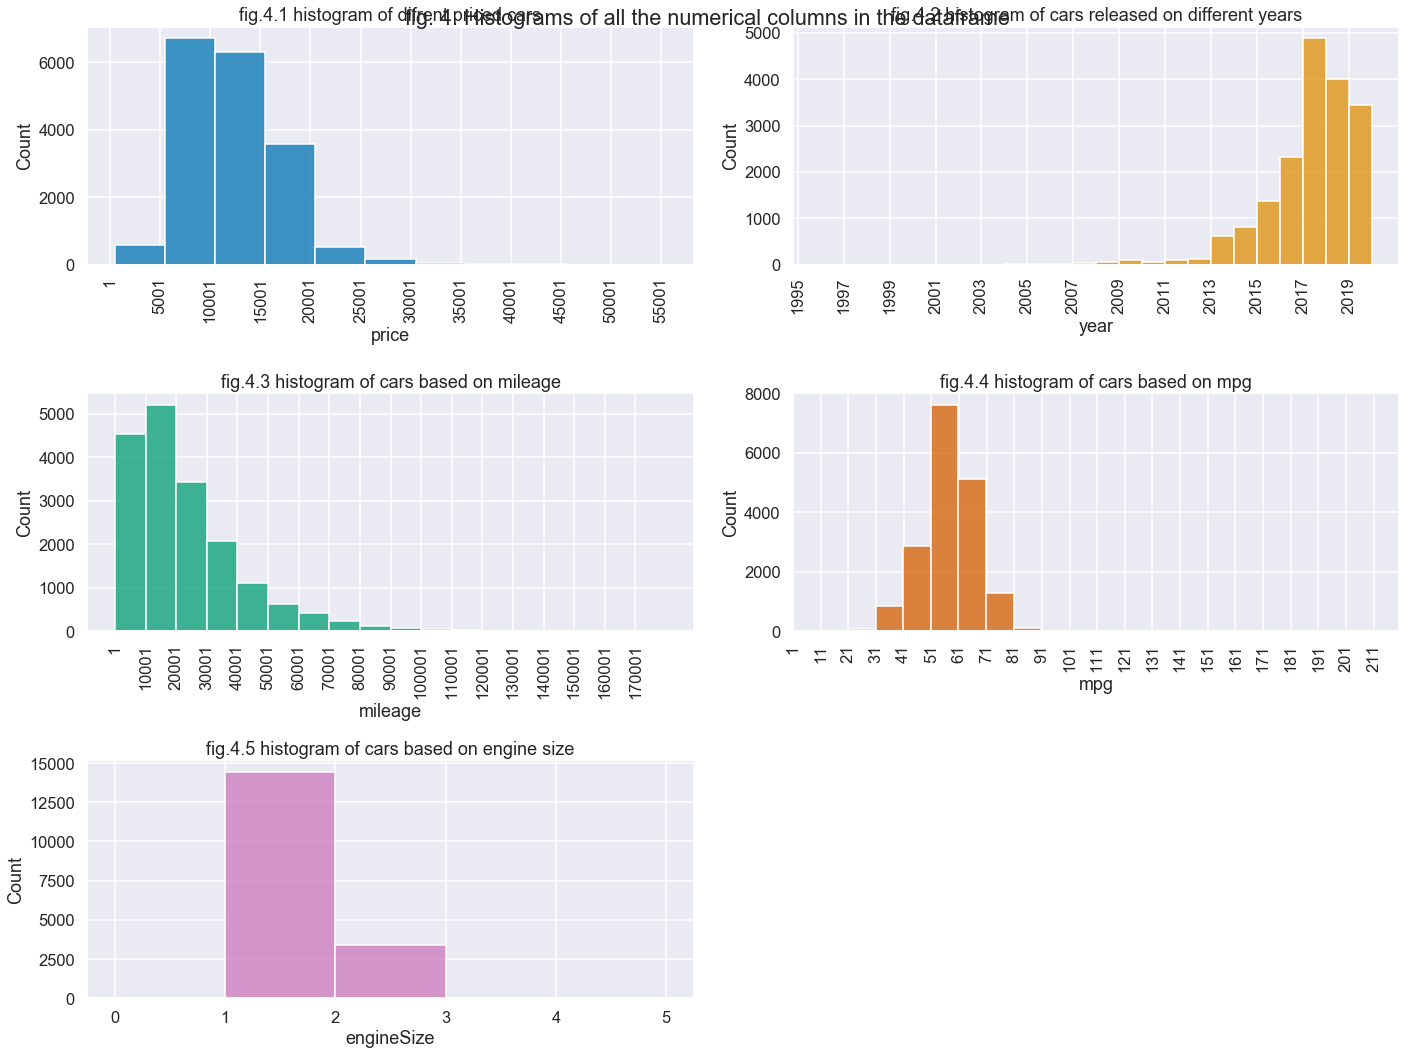

In [14]:
plt.figure(figsize=(20,15))

#subplot row1 column1 price 
plt.subplot(3,2,1)
sns.histplot(data=df, x='price', binwidth=5000 , color= plot_color[0])
plt.xticks(np.arange(1,56001,5000), rotation=90)
plt.title("fig.4.1 histogram of difrent priced cars")


#subplot row1 column2 year 
plt.subplot(3,2,2)
sns.histplot(data=df, x='year' , binwidth=1, color= plot_color[1])
plt.xticks(np.arange(1995,2021,2), rotation=90)
plt.title("fig.4.2 histogram of cars released on different years")


#subplot row2 column1 milage 
plt.subplot(3,2,3)
sns.histplot(data=df, x='mileage' , binwidth=10000 , color= plot_color[2] )
plt.xticks(np.arange(1,177801,10000), rotation=90)
plt.title("fig.4.3 histogram of cars based on mileage")


#subplot row2 column2 miles per gallon 
plt.subplot(3,2,4)
sns.histplot(data=df, x='mpg' , binwidth=10 , color= plot_color[3])
plt.xticks(np.arange(1,212,10), rotation=90)
plt.title("fig.4.4 histogram of cars based on mpg")


#subplot row3 column1 engine size
plt.subplot(3,2,5)
sns.histplot(data=df, x='engineSize', binwidth=1 , color= plot_color[4])
plt.xticks(np.arange(0,6,1), rotation=0)
plt.title("fig.4.5 histogram of cars based on engine size")

plt.suptitle("fig. 4. Histograms of all the numerical columns in the dataframe")

plt.tight_layout()
plt.show()

By analyzing the Histogram subplots we come to these conclusions
        
   in fig.4.1 Histogram of the price column shows the most frequent entry is in the bin 5001 to 10001
   <br>in fig.4.2 Histogram of the year column shows the most number of cars of the year 2018
   <br>in fig.4.3 Histogram of the mileage column shows the most number of cars have the mileage between 10001 to 20001
   <br>in fig.4.4 Histogram of the mpg column shows the most number of cars can run between 51 to 61 miles per gallon
   <br>in fig.4.5 Histogram of the mpg column shows the most number of cars have an engine size of 2


<strong>Distribution subplot of all the numeric columns in the dataframe</strong>

c:\users\alu\appdata\local\programs\python\python36\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\users\alu\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
c:\users\alu\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
c:\users\alu\appdata\local\programs\python\python36\lib\site-packages\matplotlib\cbook\__i

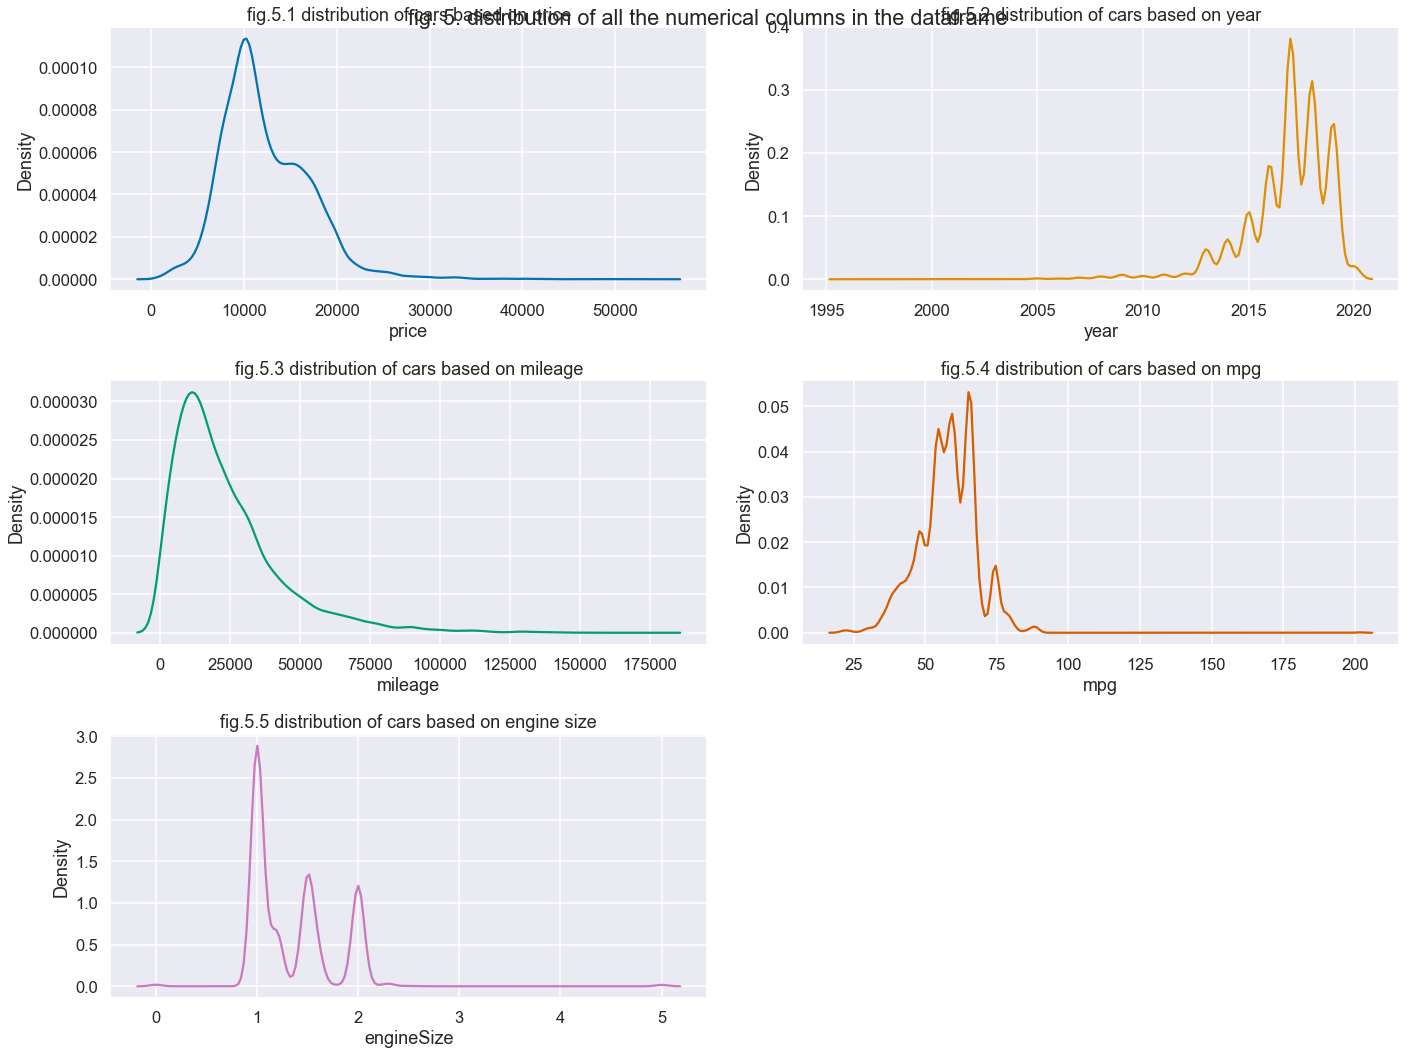

In [15]:
plt.figure(figsize=(20,15))

#subplot row1 column1 price 
plt.subplot(3,2,1)
sns.kdeplot(data=df, x='price' , color= plot_color[0])
plt.title("fig.5.1 distribution of cars based on price")


#subplot row1 column2 year 
plt.subplot(3,2,2)
sns.kdeplot(data=df, x='year' , color= plot_color[1])
plt.title("fig.5.2 distribution of cars based on year")


#subplot row2 column1 milage 
plt.subplot(3,2,3)
sns.kdeplot(data=df, x='mileage' , color= plot_color[2] )
plt.title("fig.5.3 distribution of cars based on mileage")

#subplot row2 column2 miles per gallon 
plt.subplot(3,2,4)
sns.kdeplot(data=df, x='mpg' ,  color= plot_color[3])
plt.title("fig.5.4 distribution of cars based on mpg")


#subplot row3 column1 engine size
plt.subplot(3,2,5)
sns.kdeplot(data=df, x='engineSize',  color= plot_color[4])
plt.title("fig.5.5 distribution of cars based on engine size")


plt.suptitle("fig. 5. distribution of all the numerical columns in the dataframe")


plt.tight_layout()
plt.show()

By analyzing the distribution subplots we can see that
        
   in fig.5.1 Distribution of the price column is Unimodal and Skewed Distribution
   <br>in fig.5.2 Distribution of the year column is Multimodal
   <br>in fig.5.3 Distribution of the milage column is Unimodal and Skewed Distribution
   <br>in fig.5.4 Distribution of the mpg column is Multimodal
   <br>in fig.5.5 Distribution of the engineSize column is Multimodal


<strong>Empirical Cumulative Distribution Function, ECDF subplot of all the numeric columns in the dataframe</strong>

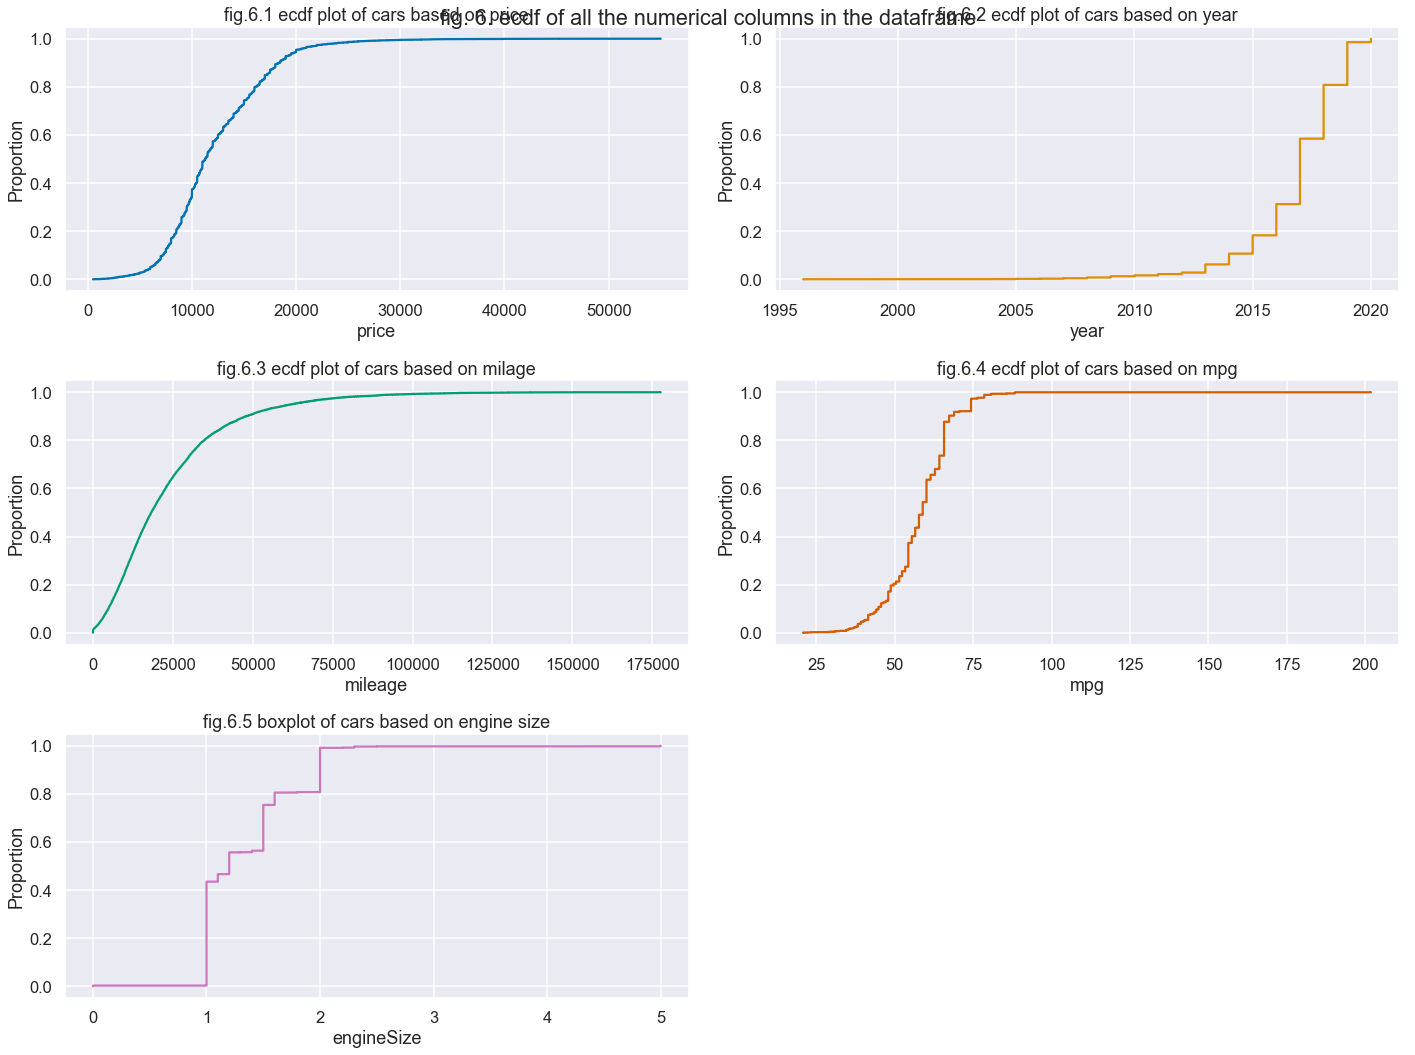

In [16]:
plt.figure(figsize=(20,15))

#subplot row1 column1 price 
plt.subplot(3,2,1)
sns.ecdfplot(data=df, x='price', color= plot_color[0])
plt.title("fig.6.1 ecdf plot of cars based on price")


#subplot row1 column2 year 
plt.subplot(3,2,2)
sns.ecdfplot(data=df, x='year', color= plot_color[1])
plt.title("fig.6.2 ecdf plot of cars based on year")

#subplot row2 column1 milage 
plt.subplot(3,2,3)
sns.ecdfplot(data=df, x='mileage', color= plot_color[2] )
plt.title("fig.6.3 ecdf plot of cars based on milage")

#subplot row2 column2 miles per gallon 
plt.subplot(3,2,4)
sns.ecdfplot(data=df, x='mpg', color= plot_color[3])
plt.title("fig.6.4 ecdf plot of cars based on mpg")

#subplot row3 column1 engine size
plt.subplot(3,2,5)
sns.ecdfplot(data=df, x='engineSize', color= plot_color[4])
plt.title("fig.6.5 boxplot of cars based on engine size")


plt.suptitle("fig. 6. ecdf of all the numerical columns in the dataframe")


plt.tight_layout()
plt.show()

By analyzing the distribution subplots we can see that
        
   in fig.6.1 ecdf of the price column we can see the probability of the cars based on price (e.g. probabilty of a car costing $12000 or less is 60%)
   <br>in fig.6.2 ecdf of the year column shows the probability of cars based on year (e.g. probability of a used car being released at year 2018 or before is 80%)
   <br>and so forth

<strong>Boxsubplot and vilonplot of all the numerical columns in the dataframe</strong>

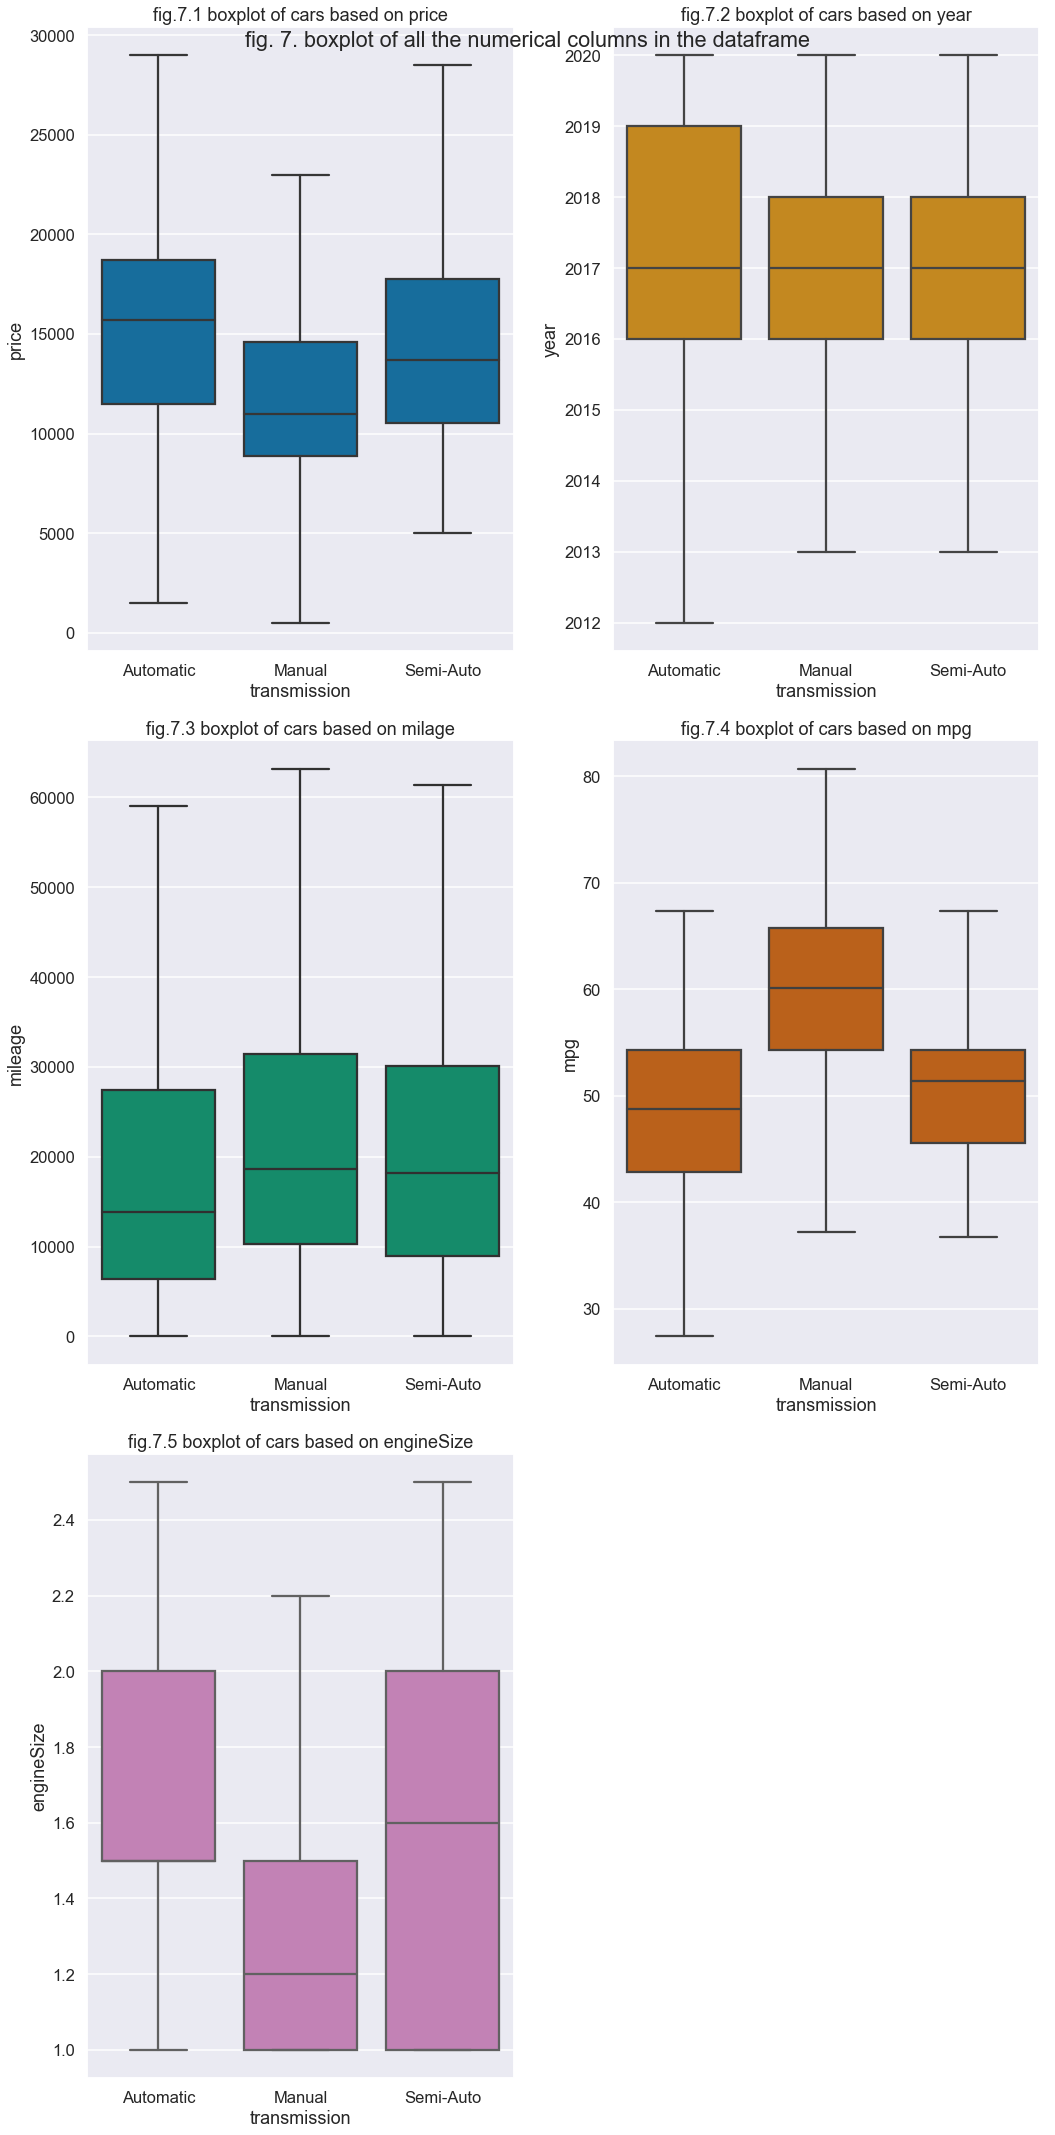

In [31]:
plt.figure(figsize=(15,30))

#subplot row1 column1 price 
plt.subplot(3,2,1)
sns.boxplot(y=df["price"], x=df['transmission'] , showfliers=False,  color= plot_color[0])
plt.title("fig.7.1 boxplot of cars based on price")


#subplot row1 column2 year 
plt.subplot(3,2,2)
sns.boxplot(y=df["year"], x=df['transmission'] , showfliers=False,  color= plot_color[1])
plt.title("fig.7.2 boxplot of cars based on year")

#subplot row2 column1 milage 
plt.subplot(3,2,3)
sns.boxplot(y=df["mileage"], x=df['transmission'] , showfliers=False,  color= plot_color[2])
plt.title("fig.7.3 boxplot of cars based on milage")

#subplot row2 column2 miles per gallon 
plt.subplot(3,2,4)
sns.boxplot(y=df["mpg"], x=df['transmission'] , showfliers=False,  color= plot_color[3])
plt.title("fig.7.4 boxplot of cars based on mpg")

#subplot row3 column1 engine size
plt.subplot(3,2,5)
sns.boxplot(y=df["engineSize"], x=df['transmission'] , showfliers=False,  color= plot_color[4])
plt.title("fig.7.5 boxplot of cars based on engineSize")


plt.suptitle("fig. 7. boxplot of all the numerical columns in the dataframe")


plt.tight_layout()
plt.show()

from fig.7 and fig.8 we can see statistics in efect of numerical variables

- in fig.7.1 in price column we can see the median of manual transmission lower that mean there is higher probablity of car with maunal transmission is higher than automatic and semi auto  

- in fig.7.2 in year column we can see the automatic transmission higher distribution that means their higher chances of car being automatic transmission if picked in random in ragards of release year 

- in fig.7.3 in mileage column we can see the 3rd quartile of manual transmission is higher which means cars with manual transmission has a higher chance of having more mileage thus lower price

- in fig.7.4 in mpg column we can see the the whole box of manual has higher value than other two which means we can get more mileage from a galon of fuel those saving money in tlong run

- in fig.7.5 in engine size column we can see that semi auto has higher deversity among all 3 

### From all the box plots we can come to conclusion is manual transmission cars are more valuable over all they cost less to buy than auto and semi auto transmission cars 

### They also save more in terms of fuel cost
